In [6]:
! pip install scipy

In [8]:
import scipy
import pylab
import scipy.cluster.hierarchy as sch

C:\Users\letter\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
C:\Users\letter\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


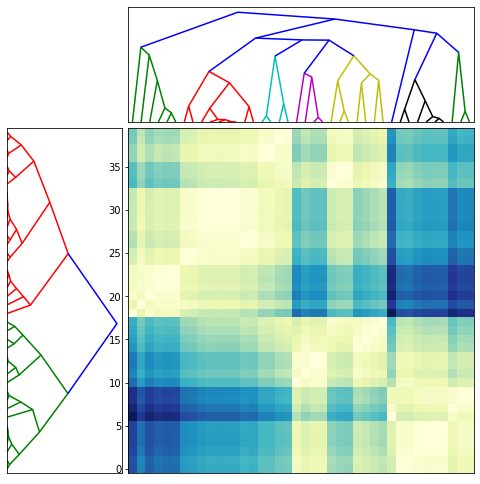

In [12]:


def fix_verts(ax, orient=1):
    for coll in ax.collections:
        for pth in coll.get_paths():
            vert = pth.vertices
            vert[1:3,orient] = scipy.average(vert[1:3,orient]) 

# Generate random features and distance matrix.
x = scipy.rand(40)
D = scipy.zeros([40,40])
for i in range(40):
    for j in range(40):
        D[i,j] = abs(x[i] - x[j])


fig = pylab.figure(figsize=(8,8))

# Compute and plot first dendrogram.
ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
Y = sch.linkage(D, method='centroid')
Z1 = sch.dendrogram(Y, orientation='right')
ax1.set_xticks([])
ax1.set_yticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Y = sch.linkage(D, method='single')
Z2 = sch.dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=pylab.cm.YlGnBu)
axmatrix.set_xticks([])
fix_verts(ax1,1)
fix_verts(ax2,0)
fig.savefig('test.png')

In [15]:
! pip install holoviews

  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080039 sha256=7b4387cc9b32aa7ad302ccd8c1c9799152f420985c180b63995c10edb0642b28
  Stored in directory: c:\users\letter\appdata\local\pip\cache\wheels\9f\9e\ac\f24f30e119df73511fde9af8aa747217ac8824e662037ba9a8
Successfully built bokeh
  Attempting uninstall: bokeh
    Found existing installation: bokeh 1.3.4
    Uninstalling bokeh-1.3.4:
      Successfully uninstalled bokeh-1.3.4


In [20]:
! pip install nxviz

  Using cached nxviz-0.6.2-py3-none-any.whl (20 kB)


### basic NetworkX practice ###

In [2]:
import networkx as nx
import nxviz as nv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
 
# read all the 5 csv files
# keep only the distinct pairs of source target since we will ignore the books and the weights
 
book1= pd.read_csv('./book1_edge.csv')
book2=pd.read_csv('./book2_edge.csv')
book3=pd.read_csv('./book3_edge.csv')

    
all_books = [book1, book2, book3]
 
li = []
 
for f in all_books:
    tmp = pd.read_csv(f)
    li.append(tmp)
 
df = pd.concat(li, axis=0, ignore_index=True)
 
df = df[['Source', 'Target']]
df.drop_duplicates(subset=['Source', 'Target'], inplace=True)
 
 
# create the networkx object
 
G = nx.from_pandas_edgelist(df,  source='Source', target='Target')
 
# How to get the number of nodes
 
print(len(G.nodes()))
 
# How to get the number of edges
 
print(len(G.edges()))

ValueError: Invalid file path or buffer object type: <class 'pandas.core.frame.DataFrame'>

In [ ]:
nx.average_shortest_path_length(G)
# 3.416225783003066
 
nx.diameter(G)
# 9
 
nx.density(G)
# 0.008921968332227173
 
nx.average_clustering(G)
# 0.4858622073350485
 
nx.transitivity(G)
# 0.2090366938564282

In [13]:
# Compute the betweenness centrality of G: bet_cen
bet_cen = nx.betweenness_centrality(G)
# Compute the degree centrality of G: deg_cen
deg_cen = nx.degree_centrality(G)
# Compute the page rank of G: page_rank
page_rank = nx.pagerank(G)
# Compute the closeness centrality of G: clos_cen
clos_cen = nx.closeness_centrality(G)



In [14]:
sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)[0:5]

[('a', 0.0), ('p', 0.0), ('l', 0.0), ('e', 0.0), ('apple', 0.0)]

In [15]:
sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)[0:5]

[('apple', 0.2), ('banana', 0.2), ('a', 0.0), ('p', 0.0), ('l', 0.0)]

In [16]:
sorted(page_rank.items(), key=lambda x:x[1], reverse=True)[0:5]

[('banana', 0.2700731111195788),
 ('a', 0.14598537777608417),
 ('p', 0.14598537777608417),
 ('l', 0.14598537777608417),
 ('e', 0.14598537777608417)]

In [17]:
sorted(clos_cen.items(), key=lambda x:x[1], reverse=True)[0:5]

[('banana', 0.2), ('a', 0.0), ('p', 0.0), ('l', 0.0), ('e', 0.0)]

In [18]:
# get all cliques
all = nx.find_cliques(G)
 
# get the largest clique
largest_clique = sorted(nx.find_cliques(G), key=lambda x:len(x))[-1]
 
largest_clique

NetworkXNotImplemented: not implemented for directed type

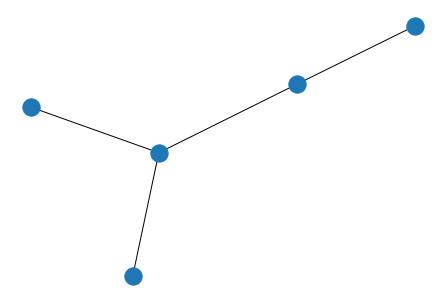

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt

graph = nx.Graph()
graph.add_nodes_from((1,2,3,4,5))
graph.add_edges_from([(1,2), (1,3),(1,4),(3,5)])

nx.draw(graph)
plt.show()


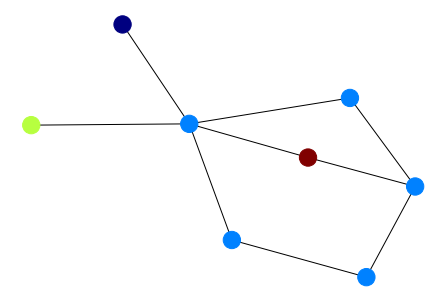

In [3]:

G = nx.Graph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

nx.draw(G, cmap = plt.get_cmap('jet'), node_color = values)
plt.show()

In [7]:
nx.draw_networkx(G[, pos, arrows, with_labels])
nx.draw_networkx(G, arrows=True, **options)
options = {
    'node_color': 'blue',
    'node_size': 100,
    'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 12,
}

G = nx.DiGraph(directed=True)

SyntaxError: invalid syntax (<ipython-input-7-4f445ffa8a43>, line 1)

C:\Users\letter\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


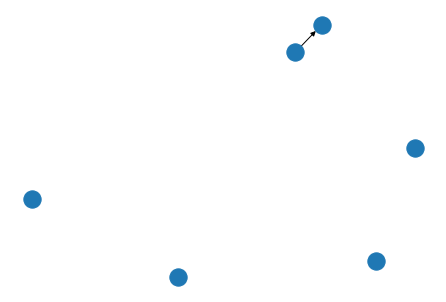

In [11]:
import networkx as nx
G= nx.DiGraph()
fruits=[li]
G.add_nodes_from('apple', kind='fruit')
G.add_edge('apple','banana')
nx.draw(G, with_lables=True)


In [ ]:
import networkx as nx
import nxviz as nv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
 
# read all the 5 csv files
# keep only the distinct pairs of source target since we will ignore the books and the weights
 
all_books = ["book1.csv", "book2.csv", "book3.csv", "book4.csv", "book5.csv"]
 
li = []
 
for f in all_books:
    tmp = pd.read_csv(f)
    li.append(tmp)
 
df = pd.concat(li, axis=0, ignore_index=True)
 
df = df[['Source', 'Target']]
df.drop_duplicates(subset=['Source', 'Target'], inplace=True)
 
 
# create the networkx object
 
G = nx.from_pandas_edgelist(df,  source='Source', target='Target')
 
# How to get the number of nodes
 
print(len(G.nodes()))
 
# How to get the number of edges
 
print(len(G.edges()))

In [ ]:
book1= pd.read_csv('./book1_edge.csv')
G= nx.Graph()
relations=[('apple','banana'),('kiwi','apple')]

### networkx 예제

In [15]:
! pip install mpld3

  Created wheel for mpld3: filename=mpld3-0.3-py3-none-any.whl size=116681 sha256=0c9654eeeb1e0aa0999ae862baf9d112e4e6ff842cbf0f2e45b0b328246cda02
  Stored in directory: c:\users\letter\appdata\local\pip\cache\wheels\26\70\6a\1c79e59951a41b4045497da187b2724f5659ca64033cf4548e
Successfully built mpld3


ModuleNotFoundError: No module named 'mpld3'

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import mpld3
%matplotlib inline

In [3]:
df= pd.read_csv('./networkx 연습/book1_edge.csv')
df

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1
...,...,...,...,...,...
679,Tyrion-Lannister,Willis-Wode,Undirected,4,1
680,Tyrion-Lannister,Yoren,Undirected,10,1
681,Tywin-Lannister,Varys,Undirected,4,1
682,Tywin-Lannister,Walder-Frey,Undirected,8,1


In [4]:
df_clean= df[['Source', 'Target', 'weight']]
df_clean

,Source,Target,weight
0,Addam-Marbrand,Jaime-Lannister,3
1,Addam-Marbrand,Tywin-Lannister,6
2,Aegon-I-Targaryen,Daenerys-Targaryen,5
3,Aegon-I-Targaryen,Eddard-Stark,4
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,4
...,...,...,...
679,Tyrion-Lannister,Willis-Wode,4
680,Tyrion-Lannister,Yoren,10
681,Tywin-Lannister,Varys,4
682,Tywin-Lannister,Walder-Frey,8


C:\Users\letter\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


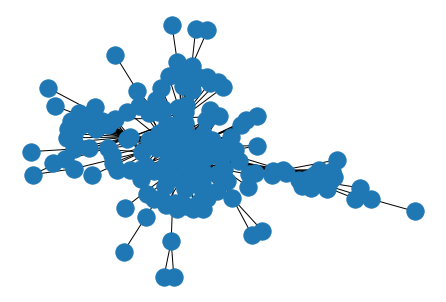

In [5]:
G= nx.from_pandas_edgelist(df_clean, source='Source', target='Target')
nx.draw(G)

    

In [17]:
Sources= list(df.Source.unique())
Targets= list(df.Target.unique())

In [18]:
dict(zip(Source, Sources))
[Source for Source in Sources]
[G.degree(Source) for Source in Sources]


[2,
 2,
 7,
 6,
 6,
 3,
 10,
 5,
 1,
 27,
 1,
 2,
 2,
 14,
 14,
 6,
 5,
 5,
 32,
 6,
 10,
 11,
 43,
 3,
 30,
 1,
 3,
 3,
 1,
 4,
 2,
 3,
 21,
 3,
 1,
 2,
 2,
 1,
 1,
 6,
 19,
 1,
 66,
 11,
 3,
 1,
 6,
 3,
 5,
 12,
 7,
 1,
 6,
 8,
 5,
 4,
 1,
 2,
 2,
 1,
 4,
 2,
 5,
 1,
 6,
 6,
 9,
 8,
 1,
 29,
 7,
 4,
 13,
 6,
 5,
 6,
 30,
 2,
 15,
 37,
 8,
 1,
 13,
 21,
 2,
 2,
 3,
 3,
 1,
 1,
 1,
 14,
 18,
 4,
 1,
 15,
 2,
 2,
 1,
 5,
 5,
 9,
 6,
 1,
 11,
 2,
 5,
 7,
 4,
 3,
 26,
 14,
 7,
 7,
 5,
 1,
 6,
 2,
 18,
 7,
 10,
 9,
 35,
 3,
 50,
 18,
 5,
 16,
 35,
 2,
 6,
 12,
 2,
 15,
 2,
 8,
 46,
 22,
 3]

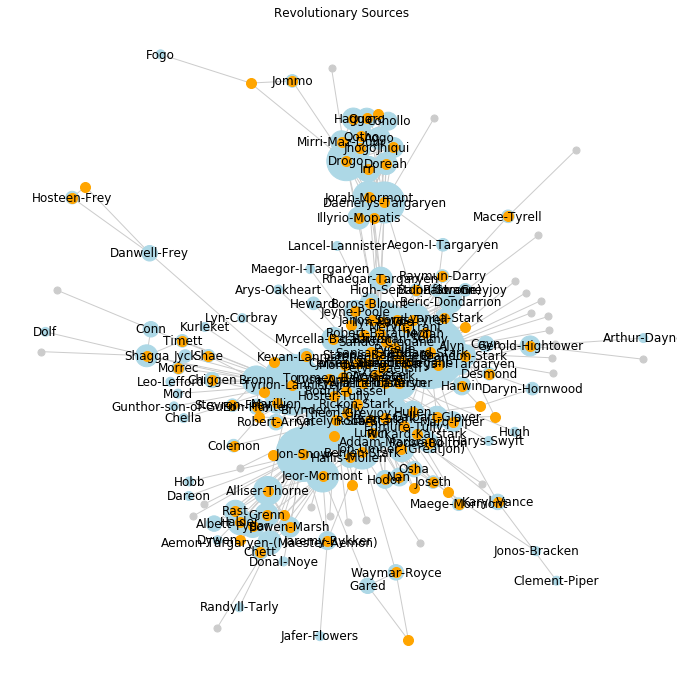

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

# 1. Create the graph
G = nx.from_pandas_edgelist(df_clean, source='Source', target='Target') 

# 2. Create a layout for our nodes 
layout = nx.spring_layout(G,iterations=50)

# 3. Draw the parts we want
# Edges thin and grey
# People small and grey
# Clubs sized according to their number of connections
# Clubs blue
# Labels for clubs ONLY
# People who are highly connected are a highlighted color

# Go through every club name, ask the graph how many
# connections it has. Multiply that by 80 to get the circle size
source_size = [G.degree(Source) * 80 for Source in Sources]
nx.draw_networkx_nodes(G, 
                       layout, 
                       nodelist=Sources, 
                       node_size=source_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

# Draw EVERYONE
nx.draw_networkx_nodes(G, layout, nodelist=Target, node_color='#cccccc', node_size=50)

# Draw POPULAR PEOPLE
popular_Target = [Target for Target in Targets if G.degree(Target) > 1]
nx.draw_networkx_nodes(G, layout, nodelist=popular_Target, node_color='orange', node_size=100)

nx.draw_networkx_edges(G, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(Sources, Sources))
nx.draw_networkx_labels(G, layout, labels=node_labels)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("Revolutionary Sources")

# 5. Tell matplotlib to show it
plt.show()

### GA USER  JOURNEY

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [2]:
data= pd.read_excel('./journey 0-2.xlsx')
data.head()

,상호작용회차,Source,Target,weight,weight(이탈),(천)(경유트래픽 개수의 합)
0,시작,main,main,1650.0,NaN,NaN
1,NaN,view,view,160.0,NaN,NaN
2,NaN,live,live,87.0,NaN,NaN
3,NaN,newslist,newslist,42.0,NaN,NaN
4,NaN,corona,corona,22.0,NaN,NaN


In [18]:

data_clean= data[['Source','Target','weight']]
data_clean['weight'].astype(float)
data_clean

,Source,Target,weight
0,main,main,1650.000
1,view,view,160.000
2,live,live,87.000
3,newslist,newslist,42.000
4,corona,corona,22.000
5,etc,etc,41.000
6,corona,live,2.700
7,corona,main,8.800
8,corona,view,2.700
9,corona,etc,0.400


In [4]:
d= data_clean.to_dict()


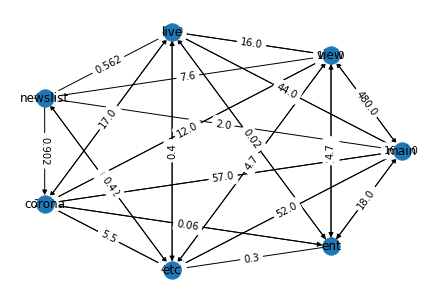

<Figure size 3600x3600 with 0 Axes>

In [23]:



# create graph
g = nx.from_pandas_edgelist(data_clean, 'Source', 'Target', edge_attr=True, create_using=nx.DiGraph)


nx.draw(g, pos=nx.circular_layout(g), with_labels=True)

#definition 
edge_labels = dict([((u, v,), g.get_edge_data(u, v)['weight']) for u, v in g.edges])


#edge, node 속성, 디테일
nx.draw_networkx_edge_labels(g,pos=nx.circular_layout(g),edge_labels=edge_labels)

plt.figure(figsize=(50,50))
plt.show()


In [ ]:
fig.savefig('MW_3month.png', dpi=fig.dpi)


### MW journey 0-4

In [67]:
data= pd.read_excel('./journey 0-4.xlsx')
data.head()
pd.options.display.float_format = '{:.2f}'.format

In [68]:
data_clean= data[['Source','Target','weight_sum']]
data_clean['weight_sum'].astype(float)

data_clean

,Source,Target,weight_sum
0,news_view,ypnews,1953.00
1,ent,news_view,391.00
2,ent,ypnews,369.40
3,news_main,news_view,93.00
4,ent,news,86.86
5,news_view,news_main,64.10
6,news_view,etc,52.30
7,live,news_main,36.50
8,news_view,ent_view,36.00
9,news,ypnews,12.00


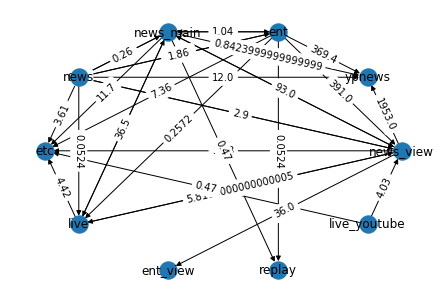

<Figure size 3600x3600 with 0 Axes>

In [70]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# create graph
g = nx.from_pandas_edgelist(data_clean, 'Source', 'Target', edge_attr=True, create_using=nx.DiGraph)

nx.draw(g, pos=nx.circular_layout(g), with_labels=True)


#definition 
edge_labels = dict([((u, v,), g.get_edge_data(u, v)['weight_sum']) for u, v in g.edges])


#edge, node 속성, 디테일
nx.draw_networkx_edge_labels(g,pos=nx.circular_layout(g),edge_labels=edge_labels)

fig= plt.figure(figsize=(50,50))



plt.show(block=False)
fig.savefig('c:/users/noira/desktop/graph.png')

### PC 0-4

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
data2= pd.read_excel('./journey 0-2.xlsx','pc_complete')
data2.head()
pd.options.display.float_format = '{:.2f}'.format

In [6]:
data_clean2= data2[['Source','Target','weight_sum']]
data_clean2['weight_sum'].astype(float)

data_clean2

,Source,Target,weight_sum
0,cs,_hdhd_live.html,3.88
1,cs,_index.html,8.86
2,cs,_ln,90.80
3,cs,_sn,18.89
4,cs,dansns_list,18.00
5,cs,etc,9.50
6,cs,news_quick,0.30
7,live,_index.html,131.70
8,live,_ln,130.60
9,live,_sn,15.04


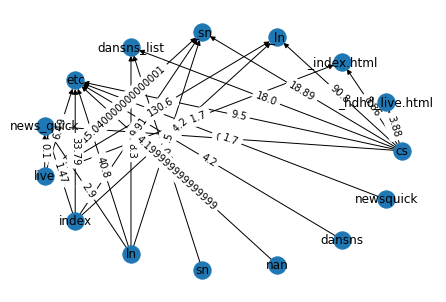

<Figure size 3600x3600 with 0 Axes>

In [9]:


# create graph
g = nx.from_pandas_edgelist(data_clean2, 'Source', 'Target', edge_attr=True, create_using=nx.DiGraph)

nx.draw(g, pos=nx.circular_layout(g), with_labels=True)


#definition 
edge_labels = dict([((u, v,), g.get_edge_data(u, v)['weight_sum']) for u, v in g.edges])


#edge, node 속성, 디테일
nx.draw_networkx_edge_labels(g,pos=nx.circular_layout(g),edge_labels=edge_labels)

fig= plt.figure(figsize=(50,50))



plt.show(block=False)


### APP 11-4

In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
data3= pd.read_excel('./journey 0-2.xlsx','APP_complete')
data3.head()
pd.options.display.float_format = '{:.2f}'.format

In [15]:
data_clean3= data3[['Source','Target','weight_sum']]
data_clean3['weight_sum'].astype(float)

data_clean3

,Source,Target,weight_sum
0,corona,ent_view,0.02
1,corona,etc,2.54
2,corona,live,4.36
3,corona,news_main,58.60
4,corona,news_view,12.15
5,corona,newslist,0.33
6,emergency,corona,0.01
7,emergency,etc,0.29
8,emergency,live,0.13
9,emergency,news_main,0.81


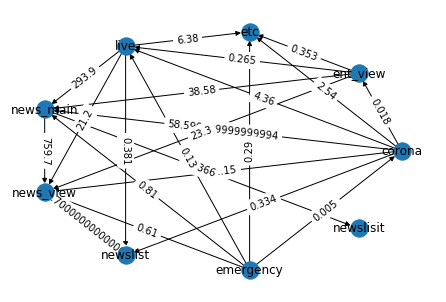

<Figure size 3600x3600 with 0 Axes>

In [16]:


# create graph
g = nx.from_pandas_edgelist(data_clean3, 'Source', 'Target', edge_attr=True, create_using=nx.DiGraph)

nx.draw(g, pos=nx.circular_layout(g), with_labels=True)


#definition 
edge_labels = dict([((u, v,), g.get_edge_data(u, v)['weight_sum']) for u, v in g.edges])


#edge, node 속성, 디테일
nx.draw_networkx_edge_labels(g,pos=nx.circular_layout(g),edge_labels=edge_labels)

fig= plt.figure(figsize=(50,50))



plt.show(block=False)
